# **Task 4**

## **DJS Synapse Learning Period**
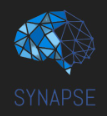

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/synapse/adult_income_dataset.csv')
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

## Dealing with Nan values

In [ ]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
df=df.dropna()
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [ ]:
#Write your code here
for i in ('relationship','race','sex'):
  print(df.groupby(i)['fnlwgt'].mean())

relationship
Husband           186819.673754
Not-in-family     191680.809345
Other-relative    206017.299213
Own-child         193500.518361
Unmarried         190790.042030
Wife              181480.642248
Name: fnlwgt, dtype: float64
race
Amer-Indian-Eskimo    123491.944056
Asian-Pac-Islander    159337.400000
Black                 228807.455449
Other                 195772.238095
White                 187285.002159
Name: fnlwgt, dtype: float64
sex
Female    185926.150480
Male      191650.246075
Name: fnlwgt, dtype: float64


## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [ ]:
#write your code here
df.drop('education-num',axis=1)
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[30162 rows x 15 columns]

## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [ ]:
#Write your code here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['education','occupation','native-country']
for i in cols:
  print(f'{i}: {len(list(df[i].unique()))}')
ohe_cols = ['workclass','marital-status','relationship','race','sex']
df = pd.get_dummies(df, columns = ohe_cols,dtype = int)
for i in cols:
      df[i] = le.fit_transform(df[i])
df

education: 16
occupation: 15
native-country: 42


age  fnlwgt  education  education-num  occupation  capital-gain  \
0       39   77516          9             13           0          2174   
1       50   83311          9             13           3             0   
2       38  215646         11              9           5             0   
3       53  234721          1              7           5             0   
4       28  338409          9             13           9             0   
...    ...     ...        ...            ...         ...           ...   
32556   27  257302          7             12          12             0   
32557   40  154374         11              9           6             0   
32558   58  151910         11              9           0             0   
32559   22  201490         11              9           0             0   
32560   52  287927         11              9           3         15024   

       capital-loss  hours-per-week  native-country  income  ...  \
0                 0              40              38       1  ...   
1                 0              13              38       1  ...   
2                 0              40              38       1  ...   
3                 0              40              38       1  ...   
4                 0              40               4       1  ...   
...             ...             ...             ...     ...  ...   
32556             0              38              38       1  ...   
32557             0              40              38       1  ...   
32558             0              40              38       1  ...   
32559             0              20              38       1  ...   
32560             0              40              38       1  ...   

       relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                           0                       0                  0   
1                           0                       0                  0   
2                           0                       0                  0   
3                           0                       0                  0   
4                           0                       0                  1   
...                       ...                     ...                ...   
32556                       0                       0                  1   
32557                       0                       0                  0   
32558                       0                       1                  0   
32559                       1                       0                  0   
32560                       0                       0                  1   

       race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  \
0                            0                        0           0   
1                            0                        0           0   
2                            0                        0           0   
3                            0                        0           1   
4                            0                        0           1   
...                        ...                      ...         ...   
32556                        0                        0           0   
32557                        0                        0           0   
32558                        0                        0           0   
32559                        0                        0           0   
32560                        0                        0           0   

       race_Other  race_White  sex_Female  sex_Male  
0               0           1           0         1  
1               0           1           0         1  
2               0           1           0         1  
3               0           0           0         1  
4               0           0           1         0  
...           ...         ...         ...       ...  
32556           0           1           1         0  
32557           0           1           0         1  
32558           0           1           1        

## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here
df['income']=df['income'].apply(lambda x:0 if x== '<=50k' else 1)
df

age  fnlwgt  education  education-num  occupation  capital-gain  \
0       39   77516          9             13           0          2174   
1       50   83311          9             13           3             0   
2       38  215646         11              9           5             0   
3       53  234721          1              7           5             0   
4       28  338409          9             13           9             0   
...    ...     ...        ...            ...         ...           ...   
32556   27  257302          7             12          12             0   
32557   40  154374         11              9           6             0   
32558   58  151910         11              9           0             0   
32559   22  201490         11              9           0             0   
32560   52  287927         11              9           3         15024   

       capital-loss  hours-per-week  native-country  income  ...  \
0                 0              40              38       1  ...   
1                 0              13              38       1  ...   
2                 0              40              38       1  ...   
3                 0              40              38       1  ...   
4                 0              40               4       1  ...   
...             ...             ...             ...     ...  ...   
32556             0              38              38       1  ...   
32557             0              40              38       1  ...   
32558             0              40              38       1  ...   
32559             0              20              38       1  ...   
32560             0              40              38       1  ...   

       relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                           0                       0                  0   
1                           0                       0                  0   
2                           0                       0                  0   
3                           0                       0                  0   
4                           0                       0                  1   
...                       ...                     ...                ...   
32556                       0                       0                  1   
32557                       0                       0                  0   
32558                       0                       1                  0   
32559                       1                       0                  0   
32560                       0                       0                  1   

       race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  \
0                            0                        0           0   
1                            0                        0           0   
2                            0                        0           0   
3                            0                        0           1   
4                            0                        0           1   
...                        ...                      ...         ...   
32556                        0                        0           0   
32557                        0                        0           0   
32558                        0                        0           0   
32559                        0                        0           0   
32560                        0                        0           0   

       race_Other  race_White  sex_Female  sex_Male  
0               0           1           0         1  
1               0           1           0         1  
2               0           1           0         1  
3               0           0           0         1  
4               0           0           1         0  
...           ...         ...         ...       ...  
32556           0           1           1         0  
32557           0           1           0         1  
32558           0           1           1        

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here
from sklearn.model_selection import train_test_split
y=df['income']
X=df.drop('income',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 37)
(9769, 37)
(22792,)
(9769,)


### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In [ ]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model=LogisticRegression()
model.fit(X_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

Find the accuracy and confusion matrix for the same and explain what it shows.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [ ]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=10)

<b>Print the Model Accuracy</b>

IndexError: index 1 is out of bounds for axis 1 with size 1

## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans: Logistic Regression: Working-it predicts the probability of a sample belonging to a certain class, and the output is probability value between 0 and 1
Why accuracy differs:if the data is not linearly separable, logistic regression may underperform

Naive Bayes: Working- it is based on the Bayes theorem, and it automatically assumes that all features are conditionally independent.It calculates the probability of each class given the features and then assigns the class with the highest probability.
Why accuracy differs- It works really well with the independence assumption, and is used for features like spam detection.

Decision Tree:Working-Splits the data into various subsets based on its features in order to obtain maximum quality data and keep errors at an all time low.
Why accuracy differs-It can model complex data, and they have a higher variance, which means that they can overfit the training data.

### Mention some real life use cases for each of these three models:

Ans:Logistic Regression: used in medical diagnosis, to predict heart disease,or risk of diabetes
Naive Bayes: used in email spam detection, and medical diagnosis with text data,sentiment analysis etc.
Decision Tree: fraud detection, medical diagnosis, risk management etc.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

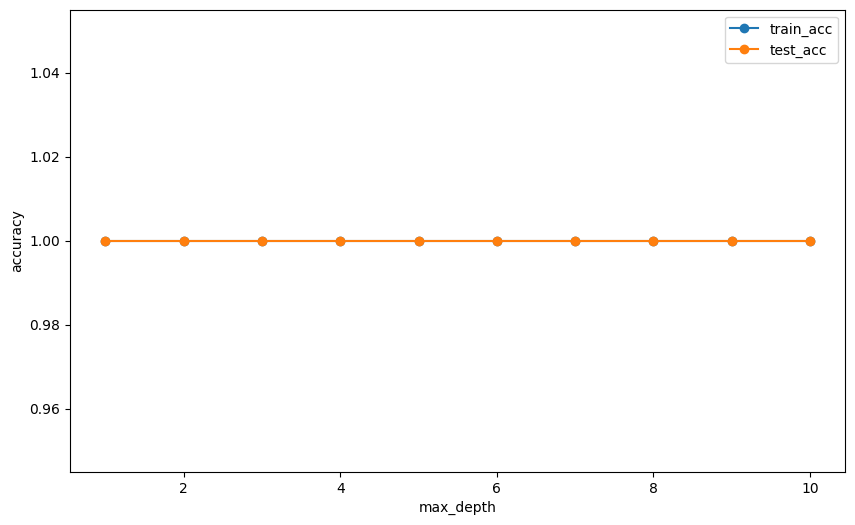

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracy=[]
test_accuracy=[]
for i in range(1,11):
  dt_model=DecisionTreeClassifier(random_state=10,max_depth=i)
  dt_model.fit(X_train,y_train)
  train_accuracy.append(dt_model.score(X_train,y_train))
  test_accuracy.append(dt_model.score(X_test,y_test))

frame=pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy,'test_acc':test_accuracy})
plt.figure(figsize=(10,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'test_acc'])
plt.show()

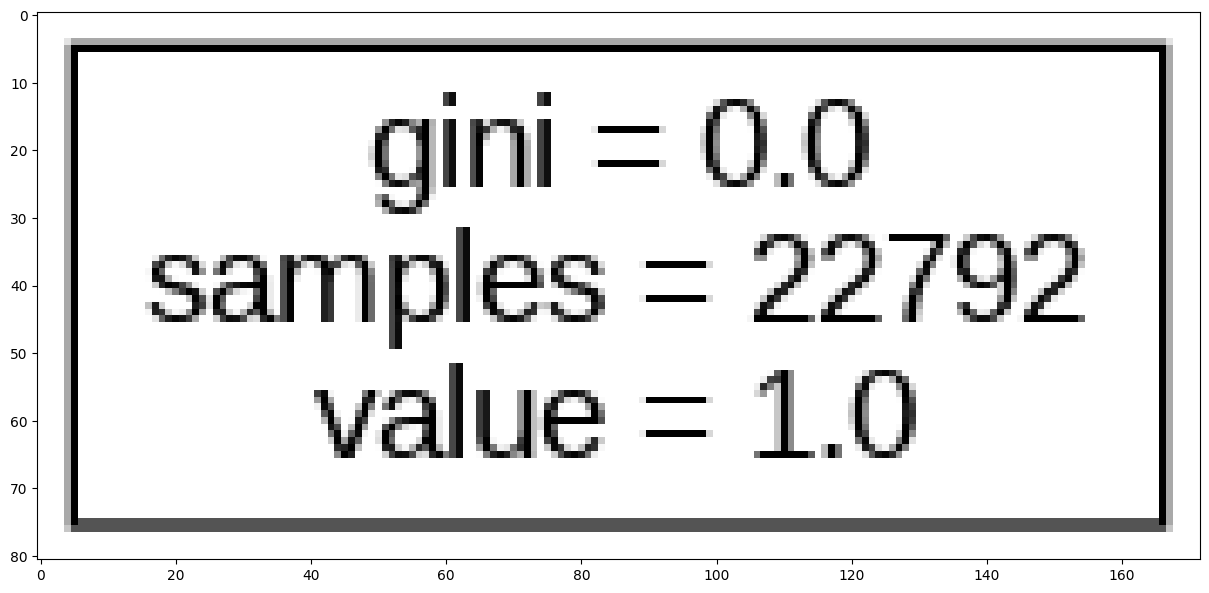

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

1.0
1.0


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#implement Random forest
import numpy as np
n_estimators=[int(x)for x in np.linspace(start=10,stop=80,num=10)]
max_features=['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}


In [ ]:
#find the accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=3,n_jobs=4)
rf_grid.fit(X_train,y_train)
print(rf_grid.score(X_train,y_train))
print(rf_grid.score(X_test,y_test))
rf_grid.best_params_



1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
153 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

*Ans*: A decision tree is a single model which separates the data into various parts based on features, forming a tree like structure, whereas a random forest is a combination of multiple decision trees and combines their predictions.

A single decision tree is easy to interpret, as one can follow the simple path from the root to the leaf, whereas in a random forest, its harder to interpret the exact route since multiple trees are present.

cases where the outputs are the same: with a small dataset with less variance,

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
bagging_classifier=BaggingClassifier(dt_model, n_estimators = 500, max_samples = 0.5, max_features = 0.5)
bagging_classifier=bagging_classifier.fit(X_train,y_train)
print(bagging_classifier.score(X_train,y_train))
print(bagging_classifier.score(X_test,y_test))

1.0
1.0


### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans:Bagging can be applied to any model eg: linear regression, SVMs etc but Random Forest is applied specifically to Decision Tree model.

We use bagging as it reduces variance, helps smooth the model’s predictions , making it more stable, and helps in generalization by combining several models, each learning different aspects of the data.


### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
abc=AdaBoostClassifier()
print(np.mean(cvs(abc,X_train,y_train,scoring='accuracy',cv=10)))
print(np.mean(cvs(abc,X_test,y_test,scoring='accuracy',cv=10)))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
!pip install scikit-learn
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0
Confusion Matrix:
[[9769]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans: Adaboost is easier to implement and it works well with non-complex data , whereas XGBoost is tougher to implement and works well with bigger, complex datasets. Adaboost struggles with noise when classifying complex datasets, but XGBoost doesnt.

XGBoost is better to use when there are larger datasets, as it is designed to handle large-scale data efficiently.In cases where the data is complex and non-linear, XGBoost performs better.

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:In bagging, models are independent of each other, whereas in boosting, models are dependent on each other.
Example(bagging): In Random Forests, each decision tree is trained on a different bootstrapped subset of data.
Example(boosting):In AdaBoost, after training a weak model, the next model gives more weight to the misclassified examples to correct them.
Bagging is applied to higher variance models, whereas boosting to lower variance ones.
Example(bagging):in random forest,multiple decision trees are used
Example(boosting):AdaBoost uses weak learners, such as decision stumps, and combines them in sequence to increase accuracy.

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
#implement pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
ccp_alphas=dt_model.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']
param_grid = {"ccp_alpha": ccp_alphas}
ccp_grid_alpha_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=10),
    scoring=make_scorer(accuracy_score),
    param_grid=param_grid
)
ccp_grid_alpha_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'ccp_alpha': array([0.])},
             scoring=make_scorer(accuracy_score, response_method='predict'))

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique

In [ ]:
#write your code here

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

In [ ]:
#write your code here

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025